In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 17.8MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 1000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


In [ ]:
# Extract binary patterns for the training characters
training_images = ["/content/1.jpg", "/content/2.jpg", "/content/3.jpg", "/content/4.jpg", "/content/5.jpg"]

binary_patterns = []
for image_path in training_images:
    binary_patterns.append(convertImageToBinary(image_path))

In [ ]:
import numpy as np

class HammingNN:
    def __init__(self, patterns):
        """
        Initialize the Hamming Neural Network with the given patterns.

        Args:
            patterns (list): A list of binary patterns (1D arrays) for training.
        """
        self.patterns = np.array(patterns)
        self.num_patterns = len(patterns)
        self.num_pixels = len(patterns[0])
        self.weights = 2 * self.patterns - 1  # Convert binary to bipolar weights (-1, 1)

    def predict(self, input_pattern):
        """
        Predict the character for a given input pattern.

        Args:
            input_pattern (list): A binary input pattern (1D array).

        Returns:
            int: The index of the recognized character pattern.
        """
        input_pattern = np.array(input_pattern)
        scores = np.dot(self.weights, input_pattern)  # Similarity scores
        return np.argmax(scores)  # Index of the highest score

In [ ]:
# Initialize the Hamming NN with the training patterns
hamming_nn = HammingNN(binary_patterns)

# Test the network with noisy inputs
test_image_paths = ["/content/noisy1.jpg", "/content/noisy2.jpg", "/content/noisy3.jpg", "/content/noisy4.jpg", "/content/noisy5.jpg"]

for i, test_image_path in enumerate(test_image_paths):
    # Convert the noisy image to binary
    test_pattern = convertImageToBinary(test_image_path)

    # Predict the character
    predicted_index = hamming_nn.predict(test_pattern)

    print(f"Noisy image {i + 1} recognized as character {predicted_index + 1}")

Noisy image 1 recognized as character 1
Noisy image 2 recognized as character 2
Noisy image 3 recognized as character 3
Noisy image 4 recognized as character 4
Noisy image 5 recognized as character 5


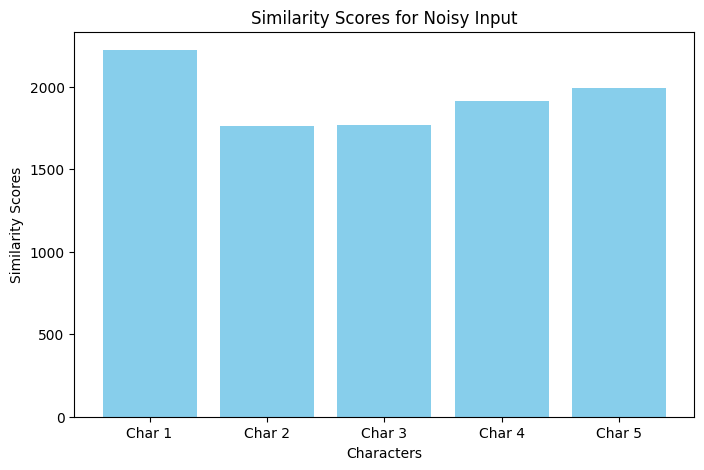

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_similarity_scores(scores, character_labels):
    """
    Visualize the similarity scores as a bar chart.

    Args:
        scores (list or numpy array): Similarity scores for each character.
        character_labels (list): Labels for each character.
    """
    plt.figure(figsize=(8, 5))
    plt.bar(character_labels, scores, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('Similarity Scores')
    plt.title('Similarity Scores for Noisy Input')
    plt.show()

# Example: Testing with one noisy image
test_pattern = convertImageToBinary("/content/noisy1.jpg")
scores = np.dot(hamming_nn.weights, test_pattern)  # Compute similarity scores
character_labels = [f"Char {i + 1}" for i in range(len(binary_patterns))]

visualize_similarity_scores(scores, character_labels)

In [ ]:
from PIL import Image
import random
import matplotlib.pyplot as plt

def generateMissingCharacterPoints(input_path, output_path, missing_point_probability=0.05):
    """
    Adds missing points to the image where white pixels are turned black and black pixels are turned white.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the image with missing points.
        missing_point_probability (float): Probability of a pixel being turned into black or white.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Determine the image's width and height in pixels.
    width, height = image.size

    # Load pixel values for the image.
    pix = image.load()

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Get the current pixel's RGB values
            r, g, b = pix[i, j]

            # Check if the pixel is white or black
            if r == 255 and g == 255 and b == 255:
                # Simulate missing data by turning white pixels to black with a certain probability
                if random.random() < missing_point_probability:
                    pix[i, j] = (0, 0, 0)  # Set the pixel to black (representing missing data)
            elif r == 0 and g == 0 and b == 0:
                # Simulate missing data by turning black pixels to white with a certain probability
                if random.random() < missing_point_probability:
                    pix[i, j] = (255, 255, 255)  # Set the pixel to white (representing missing data)

    # Save the image with missing points as a new file.
    image.save(output_path)

    return image



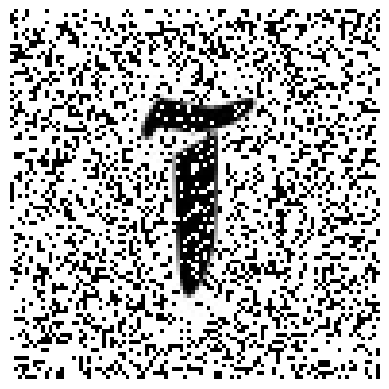

In [ ]:
# Define file paths
input_path = "/content/1.jpg"  # Replace with your image path
output_path = "/content/missing_points_image1.jpg"

# Generate an image with missing points where white pixels are turned into black and black pixels into white
missing_points_image = generateMissingCharacterPoints(input_path, output_path, missing_point_probability=0.3)

# Display the image with missing points
plt.imshow(missing_points_image)
plt.axis('off')  # Hide axes for better presentation
plt.show()

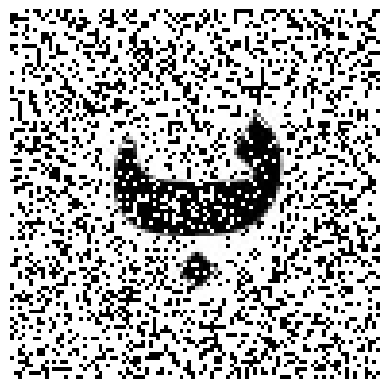

In [ ]:
# Define file paths
input_path = "/content/2.jpg"  # Replace with your image path
output_path = "/content/missing_points_image2.jpg"

# Generate an image with missing points where white pixels are turned into black and black pixels into white
missing_points_image = generateMissingCharacterPoints(input_path, output_path, missing_point_probability=0.3)

# Display the image with missing points
plt.imshow(missing_points_image)
plt.axis('off')  # Hide axes for better presentation
plt.show()

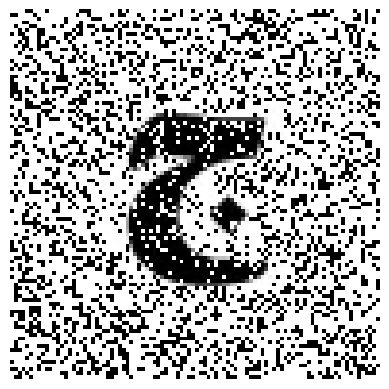

In [ ]:
# Define file paths
input_path = "/content/3.jpg"  # Replace with your image path
output_path = "/content/missing_points_image3.jpg"

# Generate an image with missing points where white pixels are turned into black and black pixels into white
missing_points_image = generateMissingCharacterPoints(input_path, output_path, missing_point_probability=0.3)

# Display the image with missing points
plt.imshow(missing_points_image)
plt.axis('off')  # Hide axes for better presentation
plt.show()

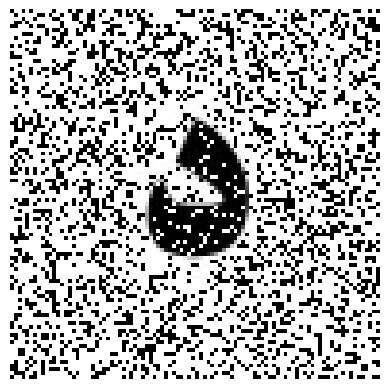

In [ ]:
# Define file paths
input_path = "/content/4.jpg"  # Replace with your image path
output_path = "/content/missing_points_image4.jpg"

# Generate an image with missing points where white pixels are turned into black and black pixels into white
missing_points_image = generateMissingCharacterPoints(input_path, output_path, missing_point_probability=0.3)

# Display the image with missing points
plt.imshow(missing_points_image)
plt.axis('off')  # Hide axes for better presentation
plt.show()

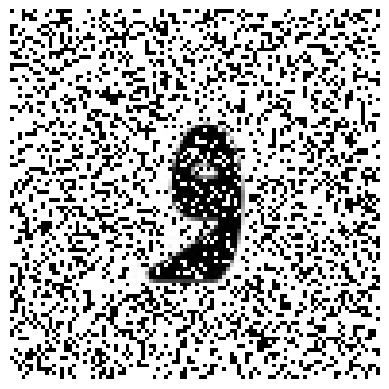

In [ ]:
# Define file paths
input_path = "/content/5.jpg"  # Replace with your image path
output_path = "/content/missing_points_image5.jpg"

# Generate an image with missing points where white pixels are turned into black and black pixels into white
missing_points_image = generateMissingCharacterPoints(input_path, output_path, missing_point_probability=0.3)

# Display the image with missing points
plt.imshow(missing_points_image)
plt.axis('off')  # Hide axes for better presentation
plt.show()

Testing Hamming NN on images with missing points:
Image with missing points 1 recognized as character 1


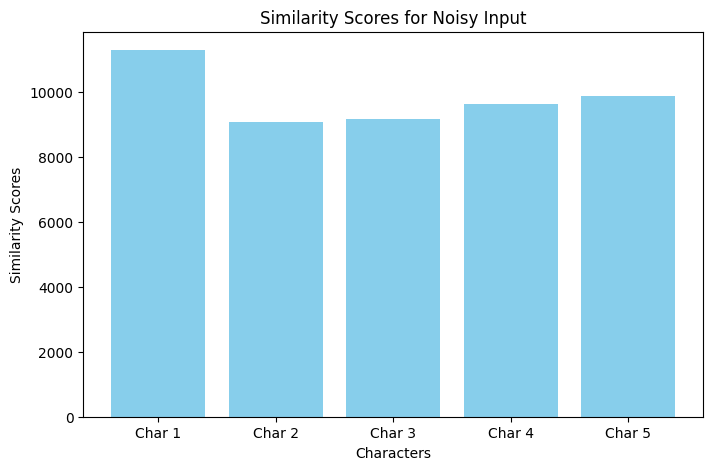

Image with missing points 2 recognized as character 2


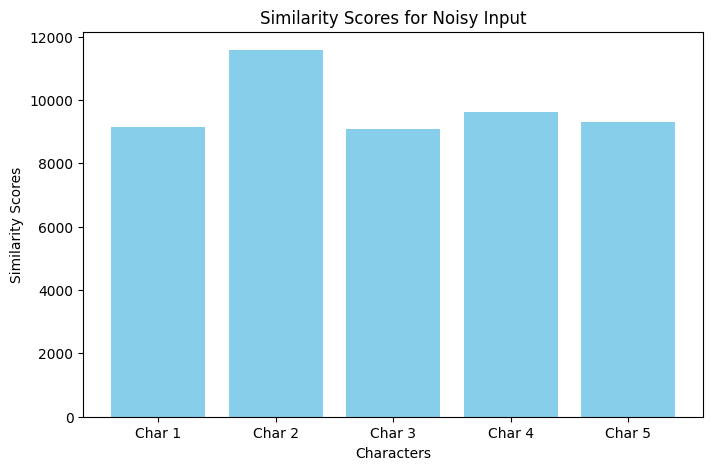

Image with missing points 3 recognized as character 3


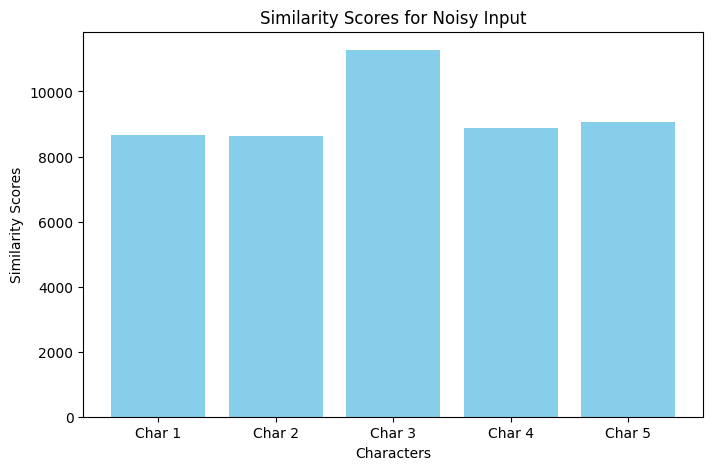

Image with missing points 4 recognized as character 4


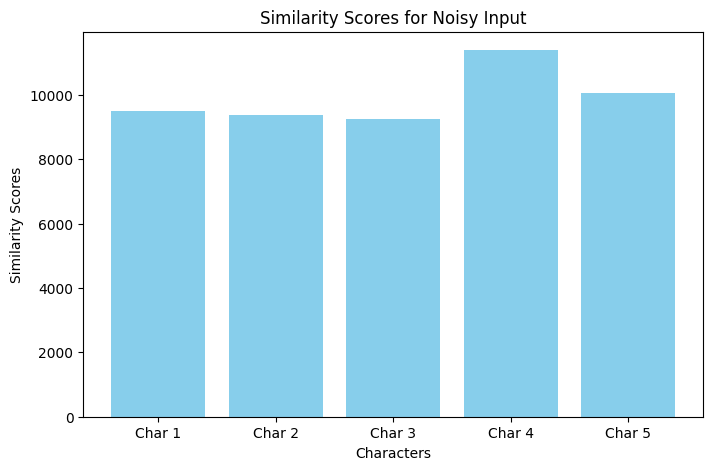

Image with missing points 5 recognized as character 5


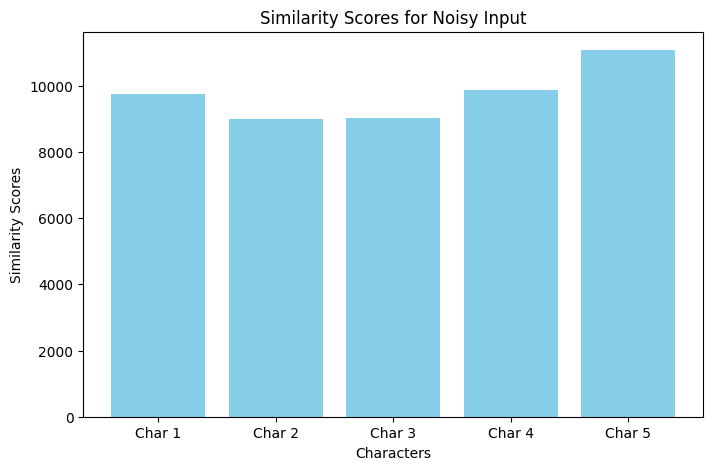

In [ ]:
# Paths to images with missing points
missing_points_images = [
    "/content/missing_points_image1.jpg",
    "/content/missing_points_image2.jpg",
    "/content/missing_points_image3.jpg",
    "/content/missing_points_image4.jpg",
    "/content/missing_points_image5.jpg"
]

# Test the network with images containing missing points
print("Testing Hamming NN on images with missing points:")
for i, test_image_path in enumerate(missing_points_images):
    # Convert the missing points image to binary
    test_pattern = convertImageToBinary(test_image_path)

    # Predict the character
    predicted_index = hamming_nn.predict(test_pattern)

    # Output the result
    print(f"Image with missing points {i + 1} recognized as character {predicted_index + 1}")

    # Compute similarity scores for visualization
    scores = np.dot(hamming_nn.weights, test_pattern)
    character_labels = [f"Char {j + 1}" for j in range(len(binary_patterns))]

    # Visualize the similarity scores for the current image
    visualize_similarity_scores(scores, character_labels)